In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("C:/Users/hp5cd/Downloads/Iris.csv")
df.drop(columns=["Id"], inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'] = df['Species'].astype('category').cat.codes

In [5]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
print("K vs Accuracy:")
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}: Accuracy = {acc:.2f}")

K vs Accuracy:
K = 1: Accuracy = 0.97
K = 2: Accuracy = 1.00
K = 3: Accuracy = 1.00
K = 4: Accuracy = 1.00
K = 5: Accuracy = 1.00
K = 6: Accuracy = 1.00
K = 7: Accuracy = 1.00
K = 8: Accuracy = 1.00
K = 9: Accuracy = 1.00
K = 10: Accuracy = 1.00
K = 11: Accuracy = 1.00
K = 12: Accuracy = 1.00
K = 13: Accuracy = 1.00
K = 14: Accuracy = 1.00
K = 15: Accuracy = 1.00
K = 16: Accuracy = 1.00
K = 17: Accuracy = 1.00
K = 18: Accuracy = 0.97
K = 19: Accuracy = 0.97
K = 20: Accuracy = 0.97



Best K = 3
Accuracy: 1.0


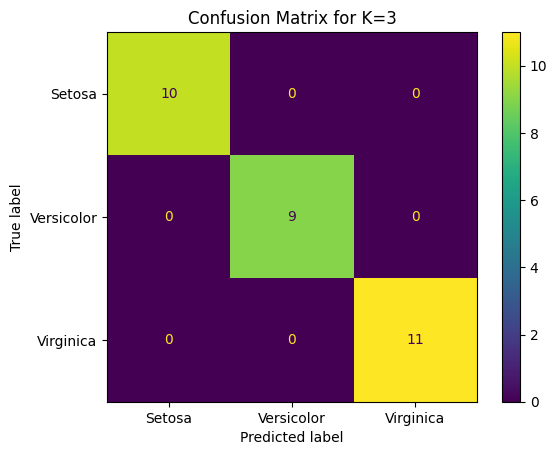

In [9]:
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print(f"\nBest K = {best_k}")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp.plot()
plt.title(f'Confusion Matrix for K={best_k}')
plt.show()

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_p, y_train_p)

KNeighborsClassifier(n_neighbors=3)

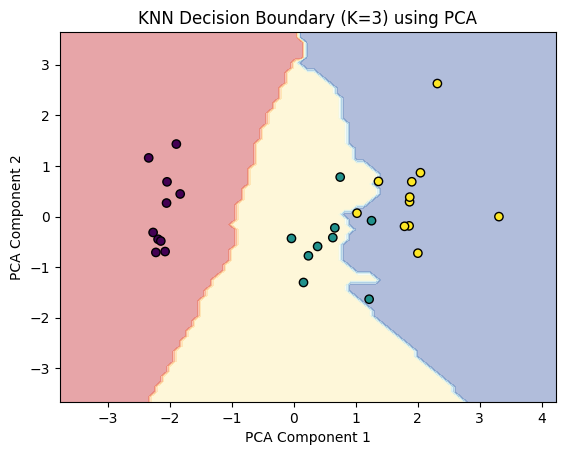

In [11]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_p[:, 0], X_test_p[:, 1], c=y_test_p, edgecolor='k')
plt.title(f"KNN Decision Boundary (K={best_k}) using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()